In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df2018 = pd.read_csv('../data/Fantasy_half_ppr_pts2018.csv')
df2019 = pd.read_csv('../data/Fantasy_half_ppr_pts2019.csv')
df2020 = pd.read_csv('../data/Fantasy_half_ppr_pts2020.csv')
df2021 = pd.read_csv('../data/Fantasy_half_ppr_pts2021.csv')
df2022 = pd.read_csv('../data/Fantasy_half_ppr_pts2022.csv')
draftrank = pd.read_csv('../data/FantasyPros_2023_Draft_ALL_Rankings.csv')

In [4]:
df2018 = df2018.assign(Season_Yr=2018)
df2019 = df2019.assign(Season_Yr=2019)
df2020 = df2020.assign(Season_Yr=2020)
df2021 = df2021.assign(Season_Yr=2021)
df2022 = df2022.assign(Season_Yr=2022)

In [5]:
combined_df = pd.concat([df2018, df2019, df2020, df2021, df2022])

In [6]:
draftrank.columns
# Define the new column names
new_column_names = {'RK': 'Rank', 'TIERS': 'Tiers', 'PLAYER NAME': 'Player Name', 'TEAM': 'Team',
                    'POS': 'Fantasy Position', 'BYE WEEK': 'Bye Week', 'SOS SEASON': 'Strength of Schedule',
                    'ECR VS. ADP': 'ECR vs. ADP'}

# Rename the columns in the combined_df DataFrame
draftrank = draftrank.rename(columns=new_column_names)

# Print the updated DataFrame with the renamed columns
print(draftrank)



     Rank  Tiers          Player Name Team Fantasy Position Bye Week  \
0       1      1  Christian McCaffrey   SF              RB1        9   
1       2      1     Justin Jefferson  MIN              WR1       13   
2       3      1        Austin Ekeler  LAC              RB2        5   
3       4      1        Ja'Marr Chase  CIN              WR2        7   
4       5      2         Travis Kelce   KC              TE1       10   
..    ...    ...                  ...  ...              ...      ...   
364   365     15          Mo Alie-Cox  IND             TE50       11   
365   366     15      Jacoby Brissett  WAS             QB35       14   
366   367     15            Eric Gray  NYG            RB107       13   
367   368     15   Gardner Minshew II  IND             QB36       11   
368   369     15         Bailey Zappe   NE             QB37       11   

    Strength of Schedule ECR vs. ADP  
0       4 out of 5 stars          +1  
1       3 out of 5 stars          -1  
2       3 out of 5

In [7]:
combined_df
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Rename columns '1' to '17' to 'wk1' to 'wk17'
new_columns = {str(i): f'wk{i}' for i in range(1, 19)}
combined_df = combined_df.rename(columns=new_columns)
print(combined_df)


         #                    Player  Pos Team   wk1   wk2   wk3   wk4   wk5  \
0      1.0        Patrick Mahomes II   QB   KC  28.3  38.8  25.3  22.9  15.8   
1      2.0                 Matt Ryan   QB   FA   8.8  30.7  40.2  29.3  14.4   
2      3.0            Todd Gurley II   RB   FA  22.2  30.8  22.1  23.6  31.3   
3      4.0        Ben Roethlisberger   QB   FA     9    39    24  14.9  21.6   
4      5.0            Saquon Barkley   RB  NYG  19.8  17.8  20.2    19  26.9   
5      6.0       Christian McCaffrey   RB   SF  10.5  20.9  20.4     -  17.8   
6      7.0            Deshaun Watson   QB  CLE    11  22.8    25  31.1    21   
7      8.0              Alvin Kamara   RB   NO  38.6  14.9  26.5  38.6   5.4   
8      9.0             Aaron Rodgers   QB  NYJ  24.9    16  19.9    15  28.7   
9     10.0                Jared Goff   QB  DET  17.2  18.4  25.6  39.3  14.3   
10    11.0                Drew Brees   QB   FA  31.6  17.6  40.5   8.6  27.2   
11    12.0            Russell Wilson   Q

What Positions seem to score the most points?

In [8]:
# Create a copy of the DataFrame to preserve the original data
combined_df = combined_df.copy()

# Get the list of years to remove "wk18" from
years_to_remove_wk18 = combined_df['Season_Yr'].unique()
years_to_remove_wk18 = list(filter(lambda year: year not in [2021, 2022], years_to_remove_wk18))

# Remove the "wk18" column from the specified years
combined_df.loc[combined_df['Season_Yr'].isin(years_to_remove_wk18), 'wk18'] = np.nan

# Define the desired column order
new_columns = ['#', 'Player', 'Pos', 'Team', 'Season_Yr', 'wk1', 'wk2', 'wk3', 'wk4', 'wk5', 'wk6',
                   'wk7', 'wk8', 'wk9', 'wk10', 'wk11', 'wk12', 'wk13', 'wk14', 'wk15', 'wk16', 'wk17',
                   'wk18', 'AVG', 'TTL']

# Reindex the DataFrame with the desired column order
combined_df = combined_df.reindex(columns=new_columns)

# Print the updated DataFrame with the columns in the desired order
print(combined_df)

         #                    Player  Pos Team  Season_Yr   wk1   wk2   wk3  \
0      1.0        Patrick Mahomes II   QB   KC       2018  28.3  38.8  25.3   
1      2.0                 Matt Ryan   QB   FA       2018   8.8  30.7  40.2   
2      3.0            Todd Gurley II   RB   FA       2018  22.2  30.8  22.1   
3      4.0        Ben Roethlisberger   QB   FA       2018     9    39    24   
4      5.0            Saquon Barkley   RB  NYG       2018  19.8  17.8  20.2   
5      6.0       Christian McCaffrey   RB   SF       2018  10.5  20.9  20.4   
6      7.0            Deshaun Watson   QB  CLE       2018    11  22.8    25   
7      8.0              Alvin Kamara   RB   NO       2018  38.6  14.9  26.5   
8      9.0             Aaron Rodgers   QB  NYJ       2018  24.9    16  19.9   
9     10.0                Jared Goff   QB  DET       2018  17.2  18.4  25.6   
10    11.0                Drew Brees   QB   FA       2018  31.6  17.6  40.5   
11    12.0            Russell Wilson   QB  DEN      

In [96]:
average_player_scores = combined_df.groupby(['Player', 'Season_Yr'])['TTL'].mean().sort_values(ascending=False)
top_players = combined_df.groupby('Player')['TTL'].mean().nlargest(5)
print(top_players)
print(average_player_scores)


Player
Patrick Mahomes II    378.520000
Josh Allen            348.220000
Justin Herbert        342.966667
Aaron Rodgers         314.100000
Tom Brady             313.960000
Name: TTL, dtype: float64
Player                    Season_Yr
Patrick Mahomes II        2022         428.90
Lamar Jackson             2019         421.70
Josh Allen                2021         417.60
Patrick Mahomes II        2018         417.10
Christian McCaffrey       2019         413.20
Josh Allen                2022         412.20
                          2020         405.60
Justin Herbert            2021         395.80
Kyler Murray              2020         390.70
Aaron Rodgers             2020         387.80
Tom Brady                 2021         386.70
Jalen Hurts               2022         384.00
Patrick Mahomes II        2020         380.40
Deshaun Watson            2020         376.30
Patrick Mahomes II        2021         374.20
Russell Wilson            2020         372.80
Joe Burrow                2022

In [100]:
# Group the DataFrame by 'Player' and calculate the average TTL
average_player_scores = combined_df.groupby('Player')['TTL'].mean().reset_index()

# Filter and select the top 3 players from the WR position
top_wr_players = average_player_scores[average_player_scores['Player'].isin(['Justin Jefferson', 'Ja\'Marr Chase'])].nlargest(4, 'TTL')

# Filter and select the top 3 players from the RB position
top_rb_players = average_player_scores[average_player_scores['Player'].isin(['Christian McCaffrey', 'Austin Ekeler'])].nlargest(4, 'TTL')

# Print the top 3 players from the WR position
print("Top 3 Players in WR position:")
print(top_wr_players)

# Print the top 3 players from the RB position
print("Top 3 Players in RB position:")
print(top_rb_players)

Top 3 Players in WR position:
               Player         TTL
621  Justin Jefferson  270.433333
463     Ja'Marr Chase  231.500000
Top 3 Players in RB position:
                  Player     TTL
197  Christian McCaffrey  250.00
65         Austin Ekeler  235.72


What position tends to be the preferred choice for a person's picks in the first five rounds?

In [42]:

# Sort the DataFrame by 'Rank' column in ascending order
draftrank_sorted = draftrank.sort_values('Rank')

# Get the positions and corresponding player names of the first 5 picks
first_5_picks = draftrank_sorted.head(5)[['Fantasy Position', 'Player Name']]

# Print the positions and corresponding player names of the first 5 picks
print(first_5_picks)

# Find the index of the first occurrence of 'QB1' in the 'Fantasy Position' column
qb1_pick = draftrank[draftrank['Fantasy Position'] == 'QB1'].index[0] + 1

# Print the pick number of QB1
print("QB1 is typically selected at pick number:", qb1_pick)

  Fantasy Position          Player Name
0              RB1  Christian McCaffrey
1              WR1     Justin Jefferson
2              RB2        Austin Ekeler
3              WR2        Ja'Marr Chase
4              TE1         Travis Kelce
QB1 is typically selected at pick number: 32


Year over Year, what position scores the most points?

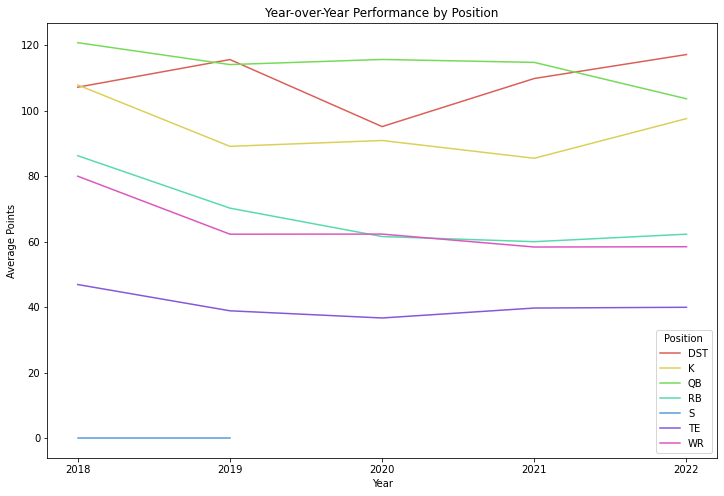

In [10]:
# Group the data in combined_df by 'Season_Yr' and 'Pos' and calculate the average points for each position in each year
position_points = combined_df.groupby(['Season_Yr', 'Pos'])['TTL'].mean().reset_index()

# Set a vibrant color palette
colors = sns.color_palette('hls', len(position_points['Pos'].unique()))

# Plot the average points scored by each position over the years
plt.figure(figsize=(12, 8))
sns.lineplot(x='Season_Yr', y='TTL', hue='Pos', data=position_points, palette=colors)
plt.title('Year-over-Year Performance by Position')
plt.xlabel('Year')
plt.ylabel('Average Points')
plt.legend(title='Position')

# Set the x-axis ticks as whole numbers
plt.xticks(position_points['Season_Yr'].unique(), map(int, position_points['Season_Yr'].unique()))

plt.show()

What player has scored the most points in 2018, 2019, 2020, 2021 and 2022

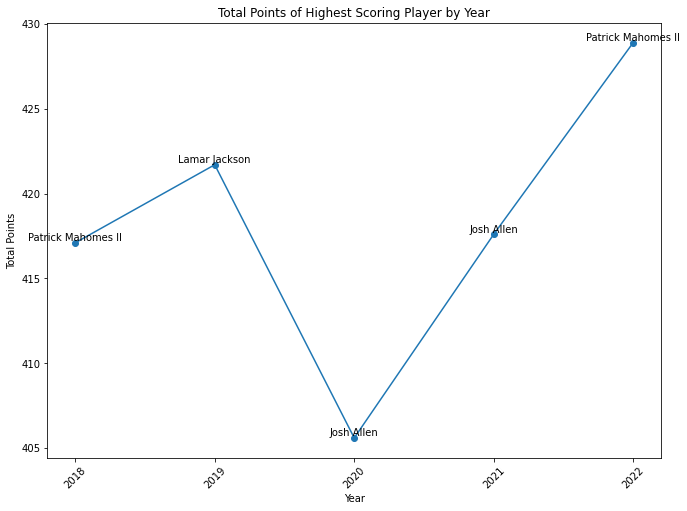

In [11]:
# Filter the data by each year and find the player with the highest total points
years = [2018, 2019, 2020, 2021, 2022]
highest_scoring_players = []
total_points = []

for year in years:
    df_year = combined_df[combined_df['Season_Yr'] == year]
    highest_scoring_player = df_year.loc[df_year['TTL'].idxmax(), 'Player']
    highest_scoring_players.append(highest_scoring_player)
    total_score = df_year.loc[df_year['TTL'].idxmax(), 'TTL']
    total_points.append(total_score)
plt.figure(figsize=(11,8))    

# plotting
plt.plot(years, total_points, marker='o')
plt.xlabel('Year')
plt.xticks(years)
plt.ylabel('Total Points')
plt.title('Total Points of Highest Scoring Player by Year')

# Add labels for the highest-scoring players
for i, player in enumerate(highest_scoring_players):
    plt.text(years[i], total_points[i], player, ha='center', va='bottom')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

Which Position catergory seems to be the most used?

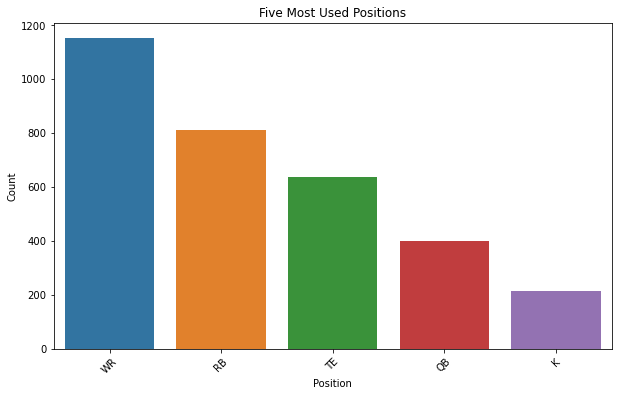

In [12]:
# Count the occurrences of each position
position_counts = combined_df['Pos'].value_counts()

# Find the five positions with the highest counts
most_used_positions = position_counts.head(5)

# Plot the five most used positions
plt.figure(figsize=(10, 6))
sns.barplot(x=most_used_positions.index, y=most_used_positions.values)
plt.title('Five Most Used Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

What Position catergory seems to be the least used?

In [13]:
# Count the occurrences of each position
position_counts = combined_df['Pos'].value_counts()

# Find the position with the lowest count
least_used_position = position_counts.idxmin()

# least used position
print("The least used position category is:", least_used_position)

The least used position category is: S


Which player tends to be the first pick consistently over the years?

In [14]:
# Group the data in combined_df by 'Season_Yr' and find the player with the highest average ranking in each year
first_pick_players = combined_df.groupby('Season_Yr')['Player'].first()

# Count the occurrences of each player in the 'Player Name' column of draftrank DataFrame
player_counts = draftrank['Player Name'].value_counts()

# player with the highest count
most_picked_player = player_counts.idxmax()

# player who tends to be the first pick consistently over the years
print("Player who tends to be the first pick consistently over the years:", most_picked_player)

Player who tends to be the first pick consistently over the years: Christian McCaffrey


What is the distribution of average performance ('AVG') across different positions ('Pos')?

      count   mean   std  min  25%   50%    75%   max
Pos                                                  
DST   160.0   6.65  1.96  2.2  5.6   6.5   7.82  14.5
K     216.0   7.12  2.52 -0.2  6.2   7.6   8.60  13.0
QB    400.0  10.07  7.74 -1.1  2.3  11.2  16.30  28.1
RB    810.0   5.30  5.24 -1.0  0.9   3.7   8.40  27.3
S       2.0   0.00  0.00  0.0  0.0   0.0   0.00   0.0
TE    638.0   3.14  3.21  0.0  0.6   2.1   4.60  17.4
WR   1151.0   4.86  4.55 -1.0  0.9   3.6   7.80  21.6


c:\Users\redst\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\redst\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\redst\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\redst\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\redst\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points 

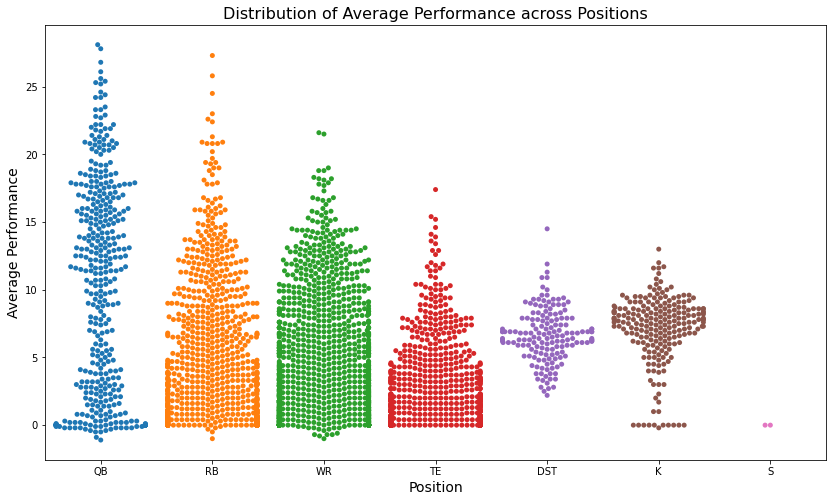

In [85]:
# Filter the DataFrame to include 'AVG' and 'Pos' columns
performance_by_position = combined_df[['AVG', 'Pos']]

# Group the DataFrame by 'Pos' and calculate descriptive statistics of 'AVG'
performance_stats = performance_by_position.groupby('Pos')['AVG'].describe()

# Round the mean, std and 75% to 2 decimal places
performance_stats['mean'] = performance_stats['mean'].round(2)
performance_stats['std'] = performance_stats['std'].round(2)
performance_stats['75%'] = performance_stats['75%'].round(2)

# Print the updated descriptive statistics
print(performance_stats)

# Distribution of average performance
plt.figure(figsize=(14, 8))
sns.swarmplot(data=performance_by_position, x='Pos', y='AVG')
plt.xlabel('Position', fontsize=14)
plt.ylabel('Average Performance', fontsize=14)
plt.title('Distribution of Average Performance across Positions', fontsize=16)
plt.show()

In [16]:

# Sort the dataframe by 'Tiers' and 'Rank' columns in descending order
sorted_df = draftrank.sort_values(by=['Tiers', 'Rank'], ascending=False)

# Get the unique top two positions
top_positions = sorted_df['Fantasy Position'].unique()[:2].tolist()

# Print the top two positions
print("Top Two positions based on Tier and ratings:", top_positions)

Top Two positions based on Tier and ratings: ['QB37', 'QB36']


In [17]:
draftrank.columns

Index(['Rank', 'Tiers', 'Player Name', 'Team', 'Fantasy Position', 'Bye Week',
       'Strength of Schedule', 'ECR vs. ADP'],
      dtype='object')

In [47]:
# Calculate average performance by team in the combined_df dataframe
combined_avg_performance = combined_df.groupby('Team')['AVG'].mean()

# Find the team with the highest average performance in the combined_df dataframe
best_team_combined = combined_avg_performance.idxmax()

# Calculate average performance by team in the draftrank dataframe
draftrank_avg_performance = draftrank.groupby('Team')['Rank'].mean()

# Find the team with the highest average performance in the draftrank dataframe
best_team_draftrank = draftrank_avg_performance.idxmin()

# Compare the teams with the highest average performance from both dataframes
if combined_avg_performance[best_team_combined] > draftrank_avg_performance[best_team_draftrank]:
    best_team = best_team_combined
else:
    best_team = best_team_draftrank

print("The team that has produced the best players based on average performance is:", best_team)

The team that has produced the best players based on average performance is: PHI


In [55]:
# Calculate average performance by team in the combined_df dataframe
combined_avg_performance = combined_df.groupby('Team')['AVG'].mean()

# Sort the teams based on average performance in descending order
top_teams_combined = combined_avg_performance.sort_values(ascending=False).head(5)

# Calculate average performance by team in the draftrank dataframe
draftrank_avg_performance = draftrank.groupby('Team')['Rank'].mean()

# Sort the teams based on average performance in ascending order
top_teams_draftrank = draftrank_avg_performance.sort_values().head(5)

# Print the top 5 teams from both dataframes
print("Top 5 teams based on avg number of well performing players")
print(top_teams_combined)
print("\nTop 5 teams based on average performance")
print(top_teams_draftrank)

Top 5 teams based on avg number of well performing players
Team
TB     7.520370
BUF    7.375000
DAL    7.365455
NO     7.312500
SF     7.311688
Name: AVG, dtype: float64

Top 5 teams based on average performance
Team
PHI    131.181818
CIN    140.500000
SF     140.700000
BUF    143.727273
KC     147.833333
Name: Rank, dtype: float64


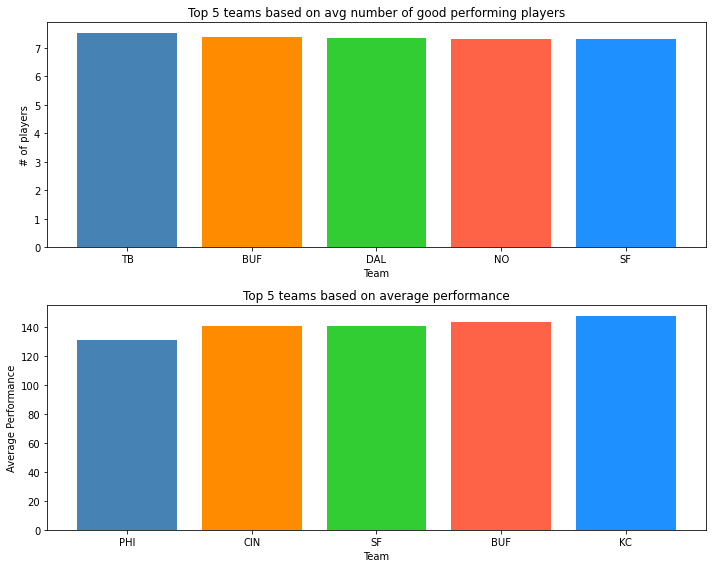

In [57]:

# Define colors for the bars
colors = ['steelblue', 'darkorange', 'limegreen', 'tomato', 'dodgerblue']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the top 5 teams from combined_df dataframe
ax1.bar(top_teams_combined.index, top_teams_combined.values, color=colors)
ax1.set_xlabel('Team')
ax1.set_ylabel('# of players')
ax1.set_title('Top 5 teams based on avg number of good performing players')

# Plot the top 5 teams from draftrank dataframe
ax2.bar(top_teams_draftrank.index, top_teams_draftrank.values, color=colors)
ax2.set_xlabel('Team')
ax2.set_ylabel('Average Performance')
ax2.set_title('Top 5 teams based on average performance')

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()